<a href="https://colab.research.google.com/github/Kunal-Aher/Kunal_Data_Study/blob/main/Laptop_price_peridiction_applied_Lasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importing libraries for data analysis and visualization

import numpy as np  # NumPy for numerical operations, arrays, and matrices
import pandas as pd  # Pandas for data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # Matplotlib for creating static, interactive, and animated visualizations
import seaborn as sns  # Seaborn for statistical data visualization based on Matplotlib


# Importing libraries for machine learning tasks

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  # Importing different linear regression models
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Importing tools for data preprocessing
# LabelEncoder: Handles categorical data by converting labels into numbers.
# StandardScaler: Standardizes numerical data by removing the mean and scaling to unit variance.
# MinMaxScaler: Scales numerical data to a specific range (usually 0 to 1).
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Importing metrics for evaluating model performance

In [4]:
pip install scikit-learn

In [16]:
df = pd.read_csv(r"/content/laptop_price - dataset.csv")
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [17]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [39]:
df.isnull().sum()
df.duplicated().sum()

0

In [37]:
def EDA():
  info=df.info()

  desc=df.describe()

  shape=df.shape

  col=df.columns

  print(info)
  print("------------------------------")
  print(desc)
  print("------------------------------")
  print(shape)
  print("------------------------------")
  print(col)
EDA()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [38]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [41]:
df.describe(include='all')

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
count,1275,1275,1275,1275.000000,1275,1275,1275,1275.000000,1275.000000,1275,1275,1275,1275,1275.000000,1275.000000
unique,19,618,6,NaN,40,3,93,NaN,NaN,39,4,106,9,NaN,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel,Core i5 7200U,NaN,NaN,256GB SSD,Intel,HD Graphics 620,Windows 10,NaN,NaN
freq,291,30,707,NaN,505,1214,193,NaN,NaN,412,704,280,1048,NaN,NaN
mean,NaN,NaN,NaN,15.022902,NaN,NaN,NaN,2.302980,8.440784,NaN,NaN,NaN,NaN,2.040525,1134.969059
std,NaN,NaN,NaN,1.429470,NaN,NaN,NaN,0.503846,5.097809,NaN,NaN,NaN,NaN,0.669196,700.752504
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,0.900000,2.000000,NaN,NaN,NaN,NaN,0.690000,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,1.500000,609.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.500000,8.000000,NaN,NaN,NaN,NaN,2.040000,989.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.700000,8.000000,NaN,NaN,NaN,NaN,2.310000,1496.500000


In [42]:
df.isna().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


<ipython-input-54-b372d69cb4a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df ,x='Company',palette='plasma', legend='auto')


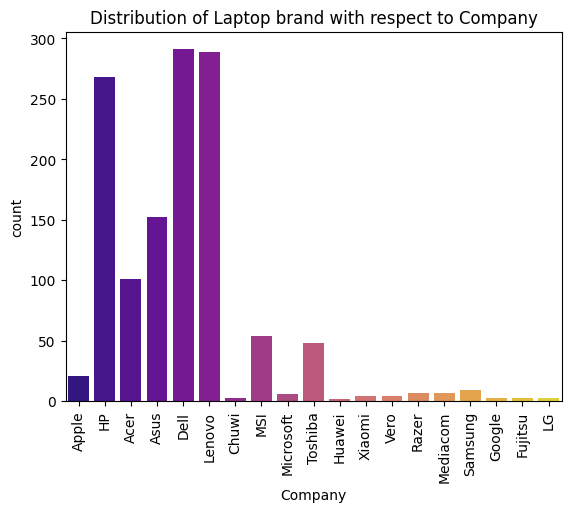

In [54]:
# Data Analysis

sns.countplot(data=df ,x='Company',palette='plasma', legend='auto')
plt.title('Distribution of Laptop brand with respect to Company')
plt.xticks(rotation=90)
plt.show()

In [53]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that :func:`histplot` function offers similar functionality with additional
    features (e.g. bar stacking), although its default behavior is somewhat different.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
    
    .. note::
        By default, this function treats one of the variables 

<ipython-input-56-660b55822e56>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df ,x='Product',palette='magma', legend='auto')


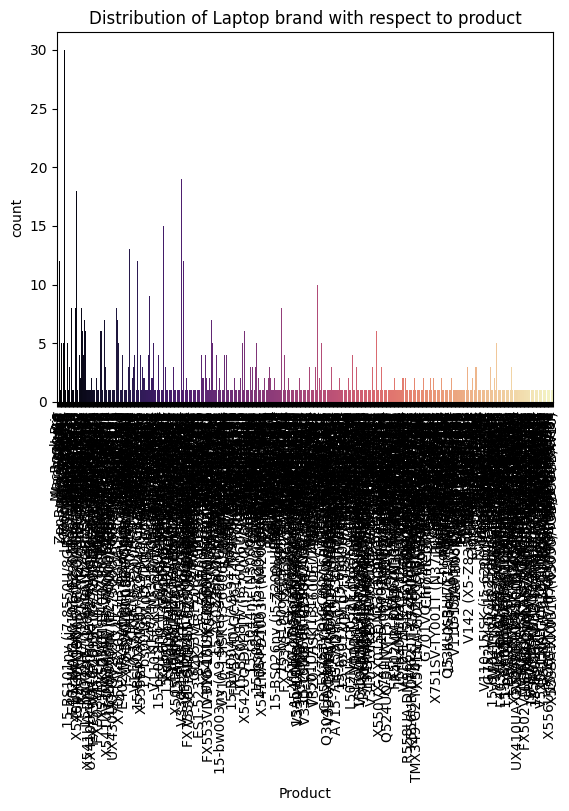

In [56]:
sns.countplot(data=df ,x='Product',palette='magma', legend='auto')
plt.title('Distribution of Laptop brand with respect to product')
plt.xticks(rotation=90)
plt.show()

<ipython-input-63-5b17ee6b28e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Company',y='Price (Euro)',palette='viridis')


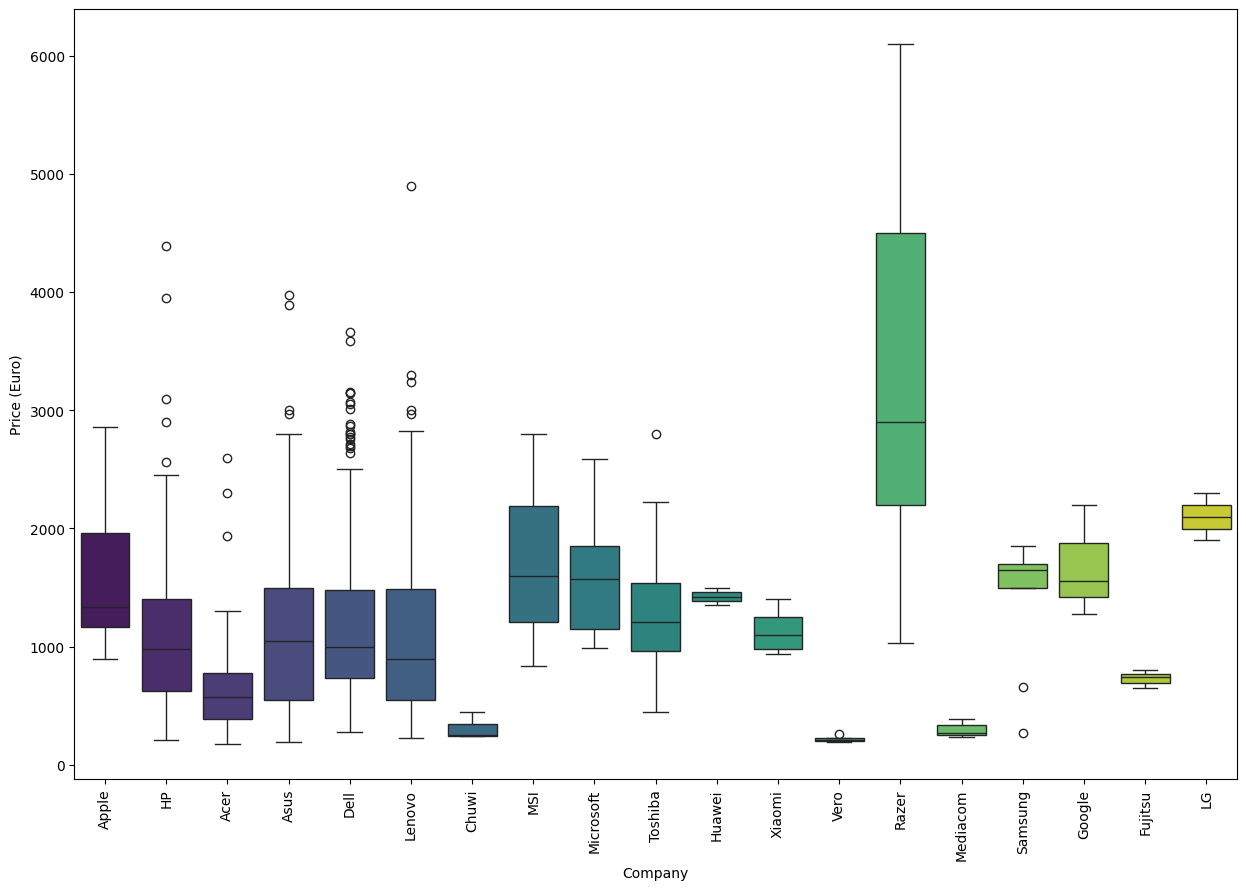

In [63]:
# Idenfying the Outliears

plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Company',y='Price (Euro)',palette='viridis')
plt.xticks(rotation=90)
plt.show()

<ipython-input-64-719a0ef3e781>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='TypeName',y='Price (Euro)',palette='viridis')


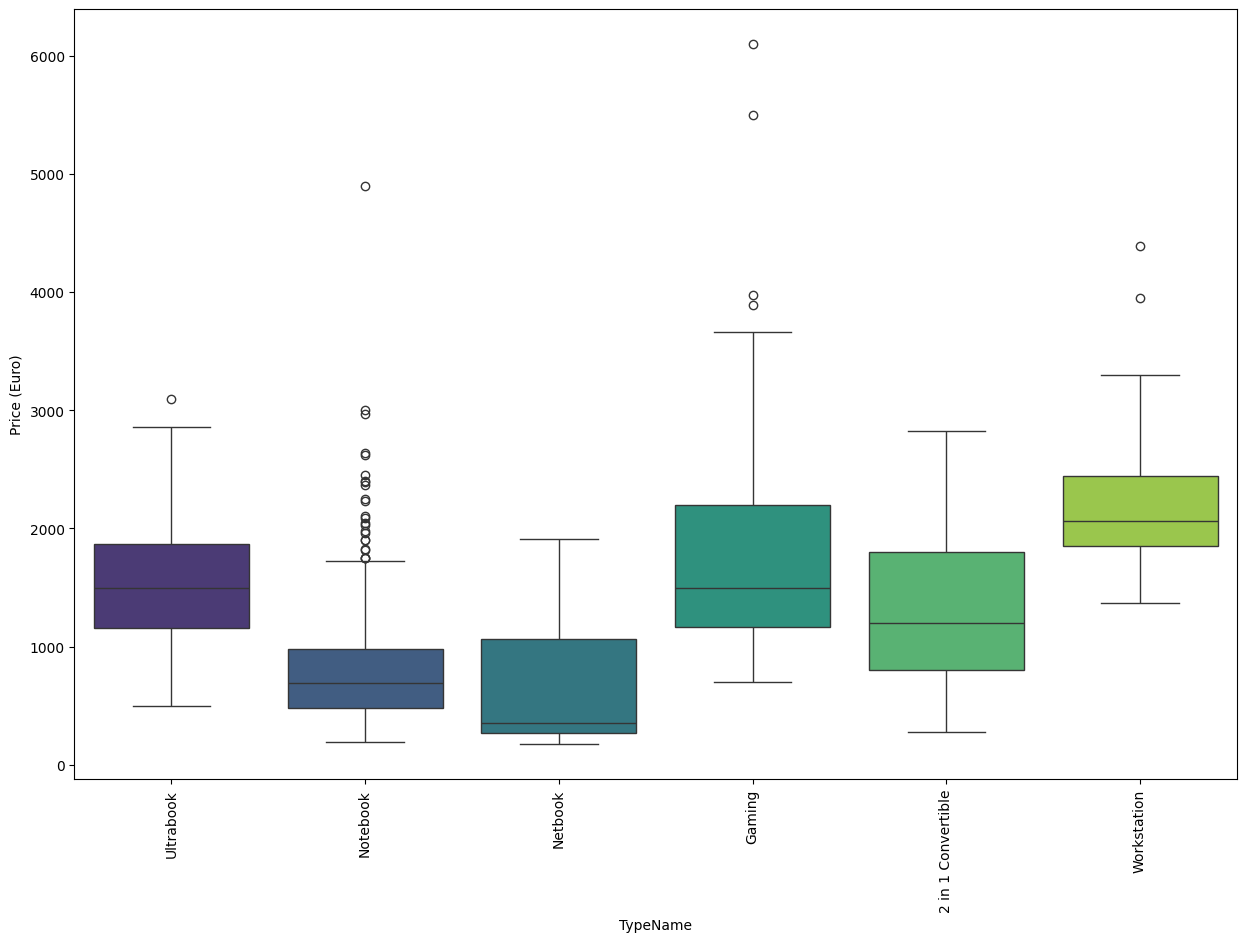

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='TypeName',y='Price (Euro)',palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [133]:
# sns.heatmap(df.corr(),annot=True)

In [71]:
# data preprocessing

encoder=LabelEncoder()
df['Company']=encoder.fit_transform(df['Company'])
df['Product']=encoder.fit_transform(df['Product'])
df['TypeName']=encoder.fit_transform(df['TypeName'])
df['ScreenResolution']=encoder.fit_transform(df['ScreenResolution'])
df['CPU_Company']=encoder.fit_transform(df['CPU_Company'])
df['CPU_Type']=encoder.fit_transform(df['CPU_Type'])
df['RAM (GB)']=encoder.fit_transform(df['RAM (GB)'])
df['Memory']=encoder.fit_transform(df['Memory'])
df['GPU_Company']=encoder.fit_transform(df['GPU_Company'])
df['GPU_Type']=encoder.fit_transform(df['GPU_Type'])
df['OpSys']=encoder.fit_transform(df['OpSys'])
df


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,300,4,13.3,23,1,40,2.3,3,4,2,56,8,1.37,1339.69
1,1,301,4,13.3,1,1,40,1.8,3,2,2,50,8,1.34,898.94
2,7,50,3,15.6,8,1,46,2.5,3,16,2,52,4,1.86,575.00
3,1,300,4,15.4,25,1,54,2.7,5,29,0,76,8,1.83,2537.45
4,1,300,4,13.3,23,1,40,3.1,3,16,2,57,8,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,0,14.0,13,1,55,2.5,1,4,2,46,5,1.80,638.00
1271,10,588,0,13.3,19,1,55,2.5,5,29,2,46,5,1.30,1499.00
1272,10,196,3,14.0,0,1,20,1.6,0,35,2,39,5,1.50,229.00
1273,7,2,3,15.6,0,1,55,2.5,2,10,0,88,5,2.19,764.00


In [67]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [79]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=pd.DataFrame()
# vif['Features']=df.columns
# vif['vif']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

# vif=vif[vif['vif']<10].sort_values(by='vif',ascending=False)
# vif

# x=vif
# y=df['Price (Euro)']


In [111]:
x=df[['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)']]
x1=df[['RAM (GB)']].values.reshape(-1,1)

y=df['Price (Euro)']

In [112]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)


x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, shuffle=True, random_state=42)

In [138]:
model1=LinearRegression()
# model1.fit(x_train,y_train)
model1.fit(x1_train,y_train)

LinearRegression()

In [139]:
pred1=model1.predict(x_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 15 features, but LinearRegression is expecting 1 features as input.

In [140]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':pred1})
df1

,Actual,Predicted
1179,650.0,515.038132
342,716.0,1230.624076
649,1584.0,1230.624076
772,1020.0,515.038132
803,1749.0,1230.624076
...,...,...
701,399.0,515.038132
1105,1413.1,1230.624076
424,2799.0,1946.210021
944,1299.0,1230.624076


In [141]:
r2_score(y_test,pred1)

0.5424724257148597

In [142]:
mean_absolute_error(y_test,pred1)

352.543901775767

In [143]:
lasso=Lasso()
lasso.fit(x1_train,y_train)

Lasso()

In [144]:
lasso_pred=lasso.predict(x1_test)
lasso_pred

array([ 515.83589743, 1230.48545396, 1230.48545396,  515.83589743,
       1230.48545396, 1230.48545396, 1587.81023222,  515.83589743,
       1945.13501048,  515.83589743, 1587.81023222, 1230.48545396,
       1230.48545396, 1230.48545396, 1945.13501048, 1230.48545396,
       1230.48545396, 1230.48545396, 1230.48545396, 1945.13501048,
        873.1606757 ,  515.83589743, 1230.48545396, 1945.13501048,
        873.1606757 , 1945.13501048,  515.83589743, 1230.48545396,
        873.1606757 , 1230.48545396, 1230.48545396,  515.83589743,
       1230.48545396,  515.83589743, 1587.81023222, 1230.48545396,
       1230.48545396,  515.83589743, 1230.48545396, 1230.48545396,
       1945.13501048,  515.83589743, 1230.48545396, 1230.48545396,
       1230.48545396, 1230.48545396, 1230.48545396,  515.83589743,
       1945.13501048, 1230.48545396, 1230.48545396,  158.51111917,
       1945.13501048,  158.51111917, 1230.48545396, 1230.48545396,
        515.83589743, 1230.48545396, 1230.48545396, 1230.48545

In [145]:
lasso_df=pd.DataFrame({'Actual':y_test,'Predicted':lasso_pred})
lasso_df

,Actual,Predicted
1179,650.0,515.835897
342,716.0,1230.485454
649,1584.0,1230.485454
772,1020.0,515.835897
803,1749.0,1230.485454
...,...,...
701,399.0,515.835897
1105,1413.1,1230.485454
424,2799.0,1945.135010
944,1299.0,1230.485454


In [146]:
r2_score(y_test,lasso_pred)

0.5424631003763696

In [147]:
ridge=Ridge()
ridge.fit(x1_train,y_train)

Ridge()

In [148]:
ridge_pred=ridge.predict(x1_test)
ridge_pred

array([ 515.31784149, 1230.57547288, 1230.57547288,  515.31784149,
       1230.57547288, 1230.57547288, 1588.20428858,  515.31784149,
       1945.83310427,  515.31784149, 1588.20428858, 1230.57547288,
       1230.57547288, 1230.57547288, 1945.83310427, 1230.57547288,
       1230.57547288, 1230.57547288, 1230.57547288, 1945.83310427,
        872.94665719,  515.31784149, 1230.57547288, 1945.83310427,
        872.94665719, 1945.83310427,  515.31784149, 1230.57547288,
        872.94665719, 1230.57547288, 1230.57547288,  515.31784149,
       1230.57547288,  515.31784149, 1588.20428858, 1230.57547288,
       1230.57547288,  515.31784149, 1230.57547288, 1230.57547288,
       1945.83310427,  515.31784149, 1230.57547288, 1230.57547288,
       1230.57547288, 1230.57547288, 1230.57547288,  515.31784149,
       1945.83310427, 1230.57547288, 1230.57547288,  157.6890258 ,
       1945.83310427,  157.6890258 , 1230.57547288, 1230.57547288,
        515.31784149, 1230.57547288, 1230.57547288, 1230.57547

In [149]:
ridge_df=pd.DataFrame({'Actual':y_test,'Predicted':ridge_pred})
ridge_df

,Actual,Predicted
1179,650.0,515.317841
342,716.0,1230.575473
649,1584.0,1230.575473
772,1020.0,515.317841
803,1749.0,1230.575473
...,...,...
701,399.0,515.317841
1105,1413.1,1230.575473
424,2799.0,1945.833104
944,1299.0,1230.575473


In [130]:
r2_score(y_test,ridge_pred)

0.5424693671649903

In [152]:
import pickle
with open('laptop.pkl','wb') as f:
  pickle.dump(model1,f)

TclError: no display name and no $DISPLAY environment variable